### Avaliação semana 3

Nesse documento contém o código usado para encontrar o número ideal de clusters para agrupar as amostras do banco de dados de músicas do Spotify "musicas_spotify_limpo.csv". 

Nome: João Victor Cordeiro

In [64]:
# Importação das libs usadas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#### Carregando os dados ⬇

In [65]:
df_spotify = pd.read_csv('./data/musicas_spotify_limpo.csv')

df_spotify.head()

,danceability,energy,loudness,tempo,valence
0,0.786,0.667,-8.272,102.046,0.688
1,0.571,0.739,-11.163,93.105,0.818
2,0.286,0.929,-8.494,99.762,0.127
3,0.725,0.607,-7.486,129.971,0.570
4,0.184,0.161,-18.261,86.351,0.087


In [66]:
# Padronizando/normalizando os dados
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_spotify)

#### Visualizando os dados ⬇

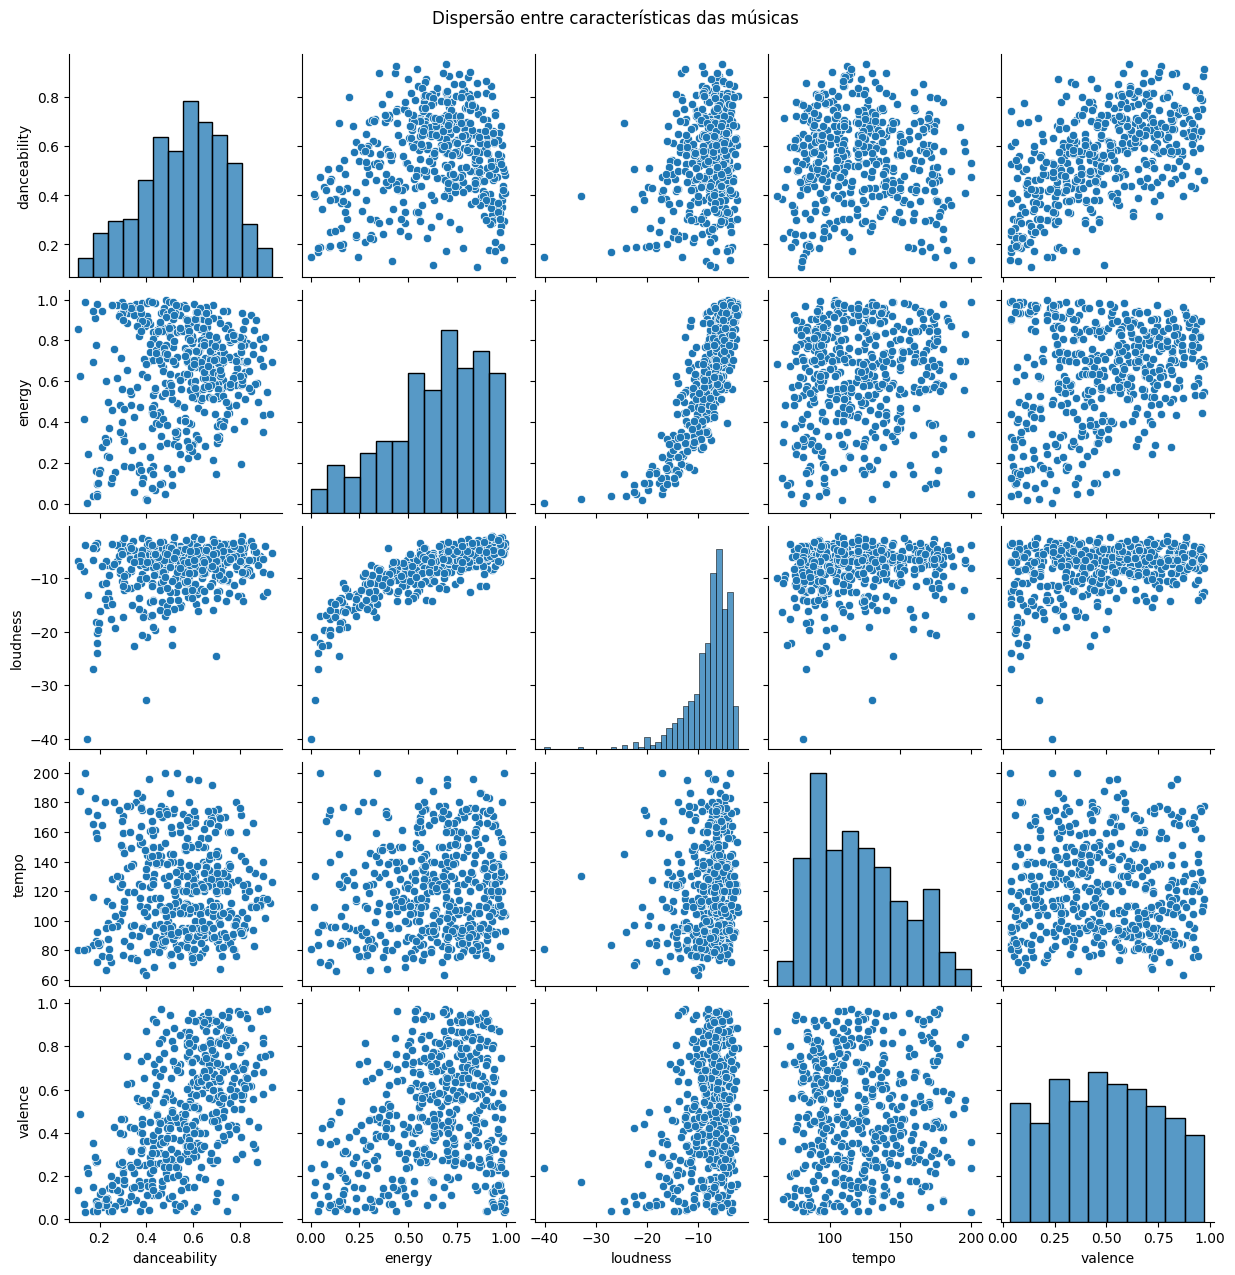

In [67]:
# Pairplot para visualizar as relações entre variáveis
sns.pairplot(df_spotify)
plt.suptitle("Dispersão entre características das músicas", y=1.02)
plt.show()

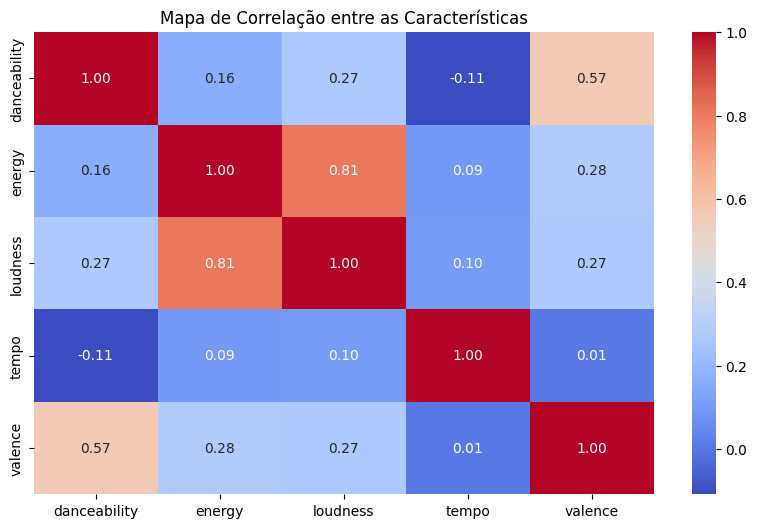

In [68]:
# Resumo das correlações entre as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(df_spotify.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Correlação entre as Características")
plt.show()

In [69]:
# Métodos para plot
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=35, linewidths=8, color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)
    
def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True, show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution), np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

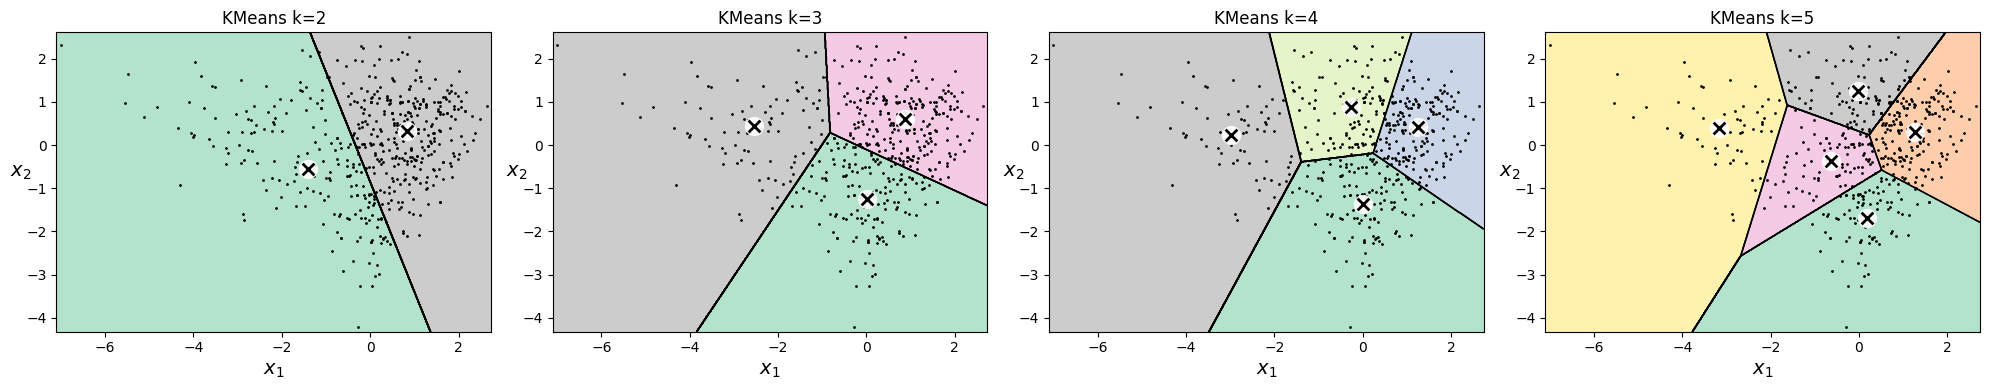

In [70]:
# Reduzindo para 2D com PCA
pca = PCA(n_components=2)
X = pca.fit_transform(df_scaled)

# Treinando o KMeans
kmeans_model_with_2_clusters = KMeans(n_clusters=2, random_state=42)
kmeans_model_with_2_clusters.fit(X)

kmeans_model_with_3_clusters = KMeans(n_clusters=3, random_state=42)
kmeans_model_with_3_clusters.fit(X)

kmeans_model_with_4_clusters = KMeans(n_clusters=4, random_state=42)
kmeans_model_with_4_clusters.fit(X)

kmeans_model_with_5_clusters = KMeans(n_clusters=5, random_state=42)
kmeans_model_with_5_clusters.fit(X)

# Plotando
plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)  # 1º gráfico
plot_decision_boundaries(kmeans_model_with_2_clusters, X)
plt.title("KMeans k=2")

plt.subplot(1, 4, 2)  # 2º gráfico
plot_decision_boundaries(kmeans_model_with_3_clusters, X)
plt.title("KMeans k=3")

plt.subplot(1, 4, 3)  # 3º gráfico
plot_decision_boundaries(kmeans_model_with_4_clusters, X)
plt.title("KMeans k=4")

plt.subplot(1, 4, 4)  # 4º gráfico
plot_decision_boundaries(kmeans_model_with_5_clusters, X)
plt.title("KMeans k=5")

plt.tight_layout()
plt.show()


#### Gerando o gráfico de cotovelo ⬇

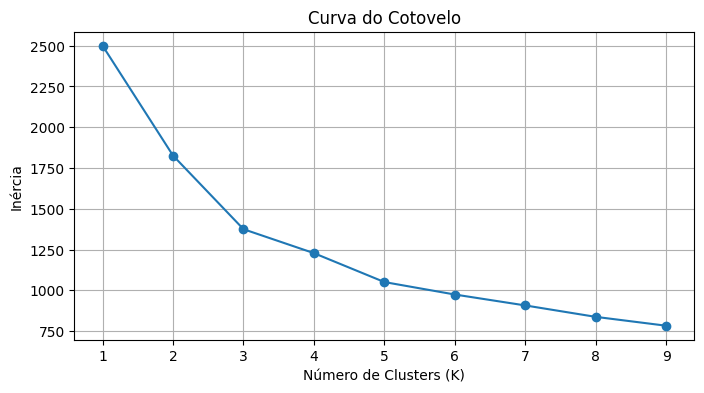

In [71]:
# Gerando a curva de cotovelo
inertias = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# Plotando a curva do cotovelo
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Curva do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

Com base no gráfico da Curva do Cotovelo, a inflexão mais visível ocorre em: K = 3 pois é a partir do 3 que a redução da inércia passa a ser pequena.

De K=1 → K=2 → K=3, há grandes quedas na inércia, de K=3 em diante, a inércia continua caindo, mas em ritmo cada vez menor.

#### Gerando o diagrama de Silhueta ⬇

K = 2 | Índice médio de silhueta: 0.2729


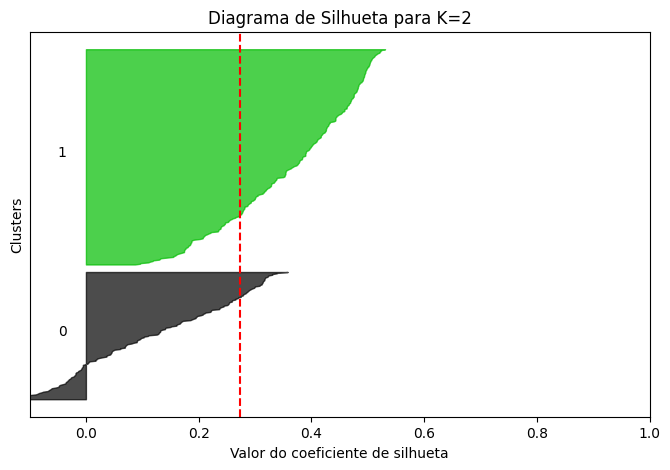

K = 3 | Índice médio de silhueta: 0.2590


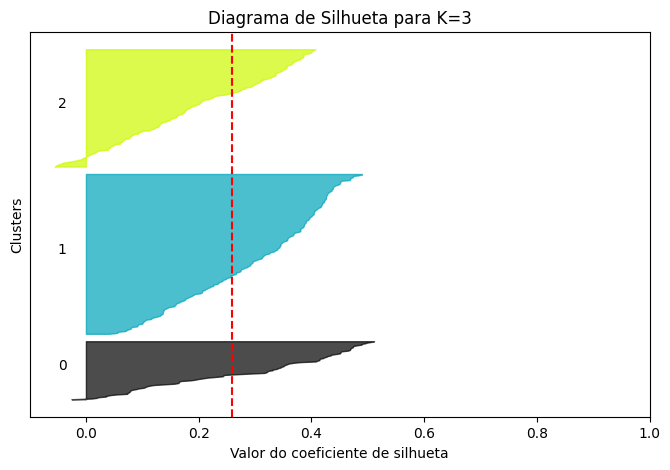

K = 4 | Índice médio de silhueta: 0.2117


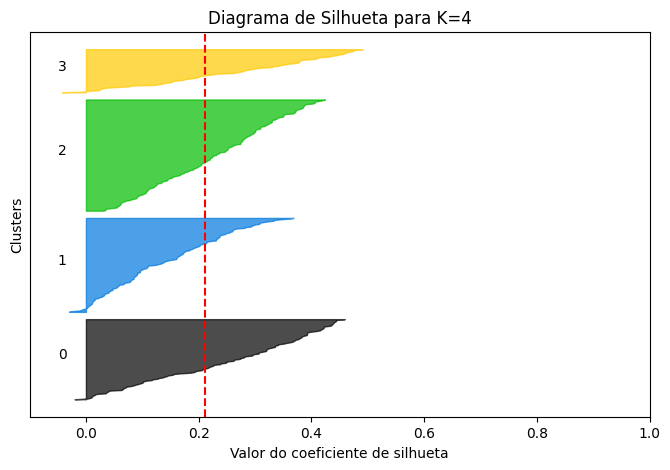

K = 5 | Índice médio de silhueta: 0.2280


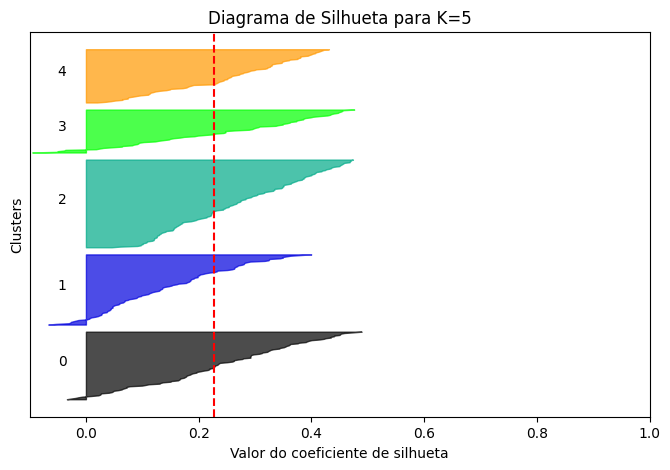

In [72]:
range_k = [2, 3, 4, 5]

for k in range_k:
    fig, ax1 = plt.subplots(figsize=(8, 5))
    
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"K = {k} | Índice médio de silhueta: {silhouette_avg:.4f}")

    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"Diagrama de Silhueta para K={k}")
    ax1.set_xlabel("Valor do coeficiente de silhueta")
    ax1.set_ylabel("Clusters")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    plt.show()


O maior índice médio de silhueta significa que os pontos estão em média melhor separados e agrupados.

Os clusters com K=2 são mais distintos entre si, menos sobreposição, menos ambiguidade.

Embora no gráfico de cotovelo K=3 foi um possível ponto de inflexão na inércia, os clusters se confundem mais do que com K=2.

#### Treinando e visualizando o modelo final ⬇

In [73]:
# KMeans com K=2 nos dados escalados
final_model = KMeans(n_clusters=2, random_state=42)
final_model.fit(df_scaled)

# Adiciona o rótulo do cluster ao DataFrame original
df_spotify['cluster'] = final_model.labels_

In [74]:
# Ver a média das características de cada cluster
cluster_summary = df_spotify.groupby('cluster')[['danceability', 'energy', 'loudness', 'tempo', 'valence']].mean()

cluster_summary


,danceability,energy,loudness,tempo,valence
cluster,,,,,
0,0.410855,0.492872,-10.701274,127.629495,0.256655
1,0.650175,0.719290,-6.510207,116.595156,0.626316


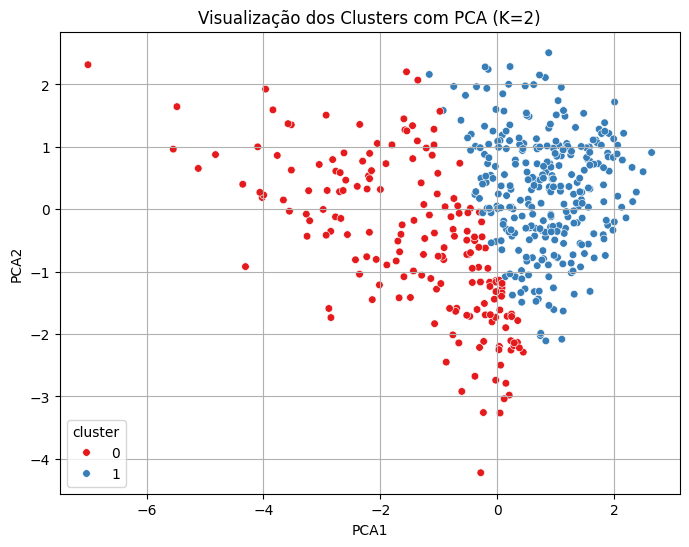

In [75]:
# Reduz para 2D com PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Adiciona as componentes principais no DataFrame
df_spotify['PCA1'] = df_pca[:, 0]
df_spotify['PCA2'] = df_pca[:, 1]

# Scatterplot com cores dos clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_spotify, x='PCA1', y='PCA2', hue='cluster', palette='Set1', s=30)
plt.title('Visualização dos Clusters com PCA (K=2)')
plt.grid(True)
plt.show()

In [76]:
# Salva com os clusters
df_spotify.to_csv('spotify_com_clusters.csv', index=False)


#### Conclusão ⬇

Com base nas etapas realizas, concluo que a separação que obtém melhor resultado (os clusters se confundem menos) é com 2 clusters. 

Como visível acima, a separação ficou muito boa fazendo o uso de 2 clusters